<a href="https://colab.research.google.com/github/seema469/AAI_511_DeepLearning/blob/main/Classical_Music_Generation_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python · Classical Music MIDI, Music Generated LSTM

**IMPORTING LIBRARIES**

In [ ]:
#Importing Libraries
import tensorflow
import numpy as np
import pandas as pd
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import sys
import warnings
import os  # Import the os module
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)


**LOADING DATA**

In [ ]:
#Loading the list of chopin's midi files as stream
from google.colab import files
uploaded = files.upload()

# Get the directory where uploaded files are stored
import os
filepath = ""  # Initialize filepath to an empty string
for filename in uploaded.keys():
    filepath = os.path.join('.', filename)  # Construct full file path directly
    break  # Exit loop after getting the directory

#Getting midi files
all_midis= []
for i in os.listdir(os.path.dirname(filepath)): # Use os.path.dirname to get the directory
    if i.endswith(".mid"):
        tr = os.path.join(os.path.dirname(filepath), i)  # Construct full file path
        midi = converter.parse(tr) # Assuming 'converter' is defined elsewhere
        all_midis.append(midi)

Saving Bwv1046 aSinfonia h.mid to Bwv1046 aSinfonia h (3).mid
Saving Bwv1014 Harpsicord and Violin Sonata 4mov.mid to Bwv1014 Harpsicord and Violin Sonata 4mov (3).mid
Saving Bwv1014 Harpsicord and Violin Sonata 3mov.mid to Bwv1014 Harpsicord and Violin Sonata 3mov (3).mid
Saving Bwv1014 Harpsicord and Violin Sonata 2mov.mid to Bwv1014 Harpsicord and Violin Sonata 2mov (3).mid
Saving Bwv1014 Harpsicord and Violin Sonata 1mov.mid to Bwv1014 Harpsicord and Violin Sonata 1mov (3).mid
Saving Bwv1005 Violin Sonata n3 4mov Allegro.mid to Bwv1005 Violin Sonata n3 4mov Allegro (3).mid
Saving Bwv1005 Violin Sonata n3 3mov Largo.mid to Bwv1005 Violin Sonata n3 3mov Largo (3).mid
Saving Bwv1005 Violin Sonata n3 2mov Fugue.mid to Bwv1005 Violin Sonata n3 2mov Fugue (3).mid
Saving Bwv1005 Violin Sonata n3 1mov Adagio.mid to Bwv1005 Violin Sonata n3 1mov Adagio (3).mid
Saving Bwv0998 Prelude Fugue Allegro for Lute 3mov.mid to Bwv0998 Prelude Fugue Allegro for Lute 3mov (3).mid
Saving Bwv0998 Prelude

Note: The musical notes are the building blocks of the music. It pertains to a pitch associated with a specific audio vibration. Western music utilizes twelve musical notes.

Chord: A group of notes that sound good together is a chord.

The music21 stream that was created in the above cell contains both, chords and notes, we will extract them in the form of notes and obtain a series of notes in the musical composition.

In [ ]:
#Helping function
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes
#Getting the list of notes as Corpus
Corpus= extract_notes(all_midis)
print("Total notes in all the Chopin midis in the dataset:", len(Corpus))

Total notes in all the Chopin midis in the dataset: 1088345


**DATA EXPLORATION**

The data is in the form of a corpus: a list of strings.  Each string indicates a musical note.

This section will include:

1.   Exploring the data Corpus
2.   Examine all the notes in the Corpus
3.   Simplifying our Corpus to Built a working model












In [ ]:
print("First fifty values in the Corpus:", Corpus[:50])

First fifty values in the Corpus: ['C3', 'C5', 'D5', 'E-5', 'G5', 'B5', 'C6', 'B-2', 'C6', 'G#2', 'C5', 'D5', 'E-5', 'G5', 'B5', 'C6', 'G2', 'C6', 'F2', 'C5', 'D5', 'E-5', 'G5', 'B5', 'C6', 'E-2', 'C6', 'F2', 'B-5', 'G#5', 'G5', 'F5', 'E-5', 'D5', 'C5', 'B4', 'G2', 'C5', 'D5', 'G#4', 'G4', 'F5', 'E-5', 'C2', 'D5', 'C5', 'E-3', 'B4', 'C5', 'D5']


All these values indicate the notes, as mentioned above.

**Printing the music sheet**

In [ ]:
!apt-get update
!apt-get install lilypond

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,184 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,127 kB]
Get:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:14 http://archiv

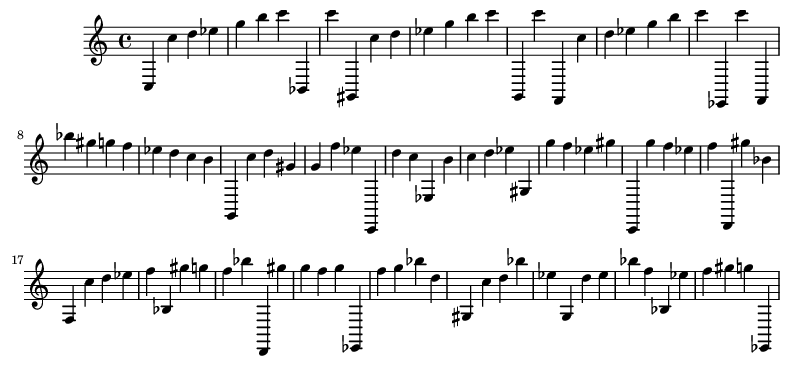

In [ ]:
#First Lets write some functions that we need to look into the data
def show(music):
    display(Image(str(music.write("lily.png"))))

def chords_n_notes(Snippet):
    Melody = []
    offset = 0 #Incremental
    for i in Snippet:
        #If it is chord
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".") #Seperating the notes in chord
            notes = []
            for j in chord_notes:
                inst_note=int(j)
                note_snip = note.Note(inst_note)
                notes.append(note_snip)
                chord_snip = chord.Chord(notes)
                chord_snip.offset = offset
                Melody.append(chord_snip)
        # pattern is a note
        else:
            note_snip = note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
        # increase offset each iteration so that notes do not stack
        offset += 1
    Melody_midi = stream.Stream(Melody)
    return Melody_midi

Melody_Snippet = chords_n_notes(Corpus[:100])
show(Melody_Snippet)

In [ ]:
#to play audio or corpus
print("Sample Audio From Data")
IPython.display.Audio("../input/music-generated-lstm/Corpus_Snippet.wav")

Examine all the notes in the Corpus

In [ ]:
#Creating a count dictionary
count_num = Counter(Corpus)
print("Total unique notes in the Corpus:", len(count_num))

Total unique notes in the Corpus: 377


In [ ]:
#Exploring the notes dictionary
Notes = list(count_num.keys())
Recurrence = list(count_num.values())
#Average recurrenc for a note in Corpus
def Average(lst):
    return sum(lst) / len(lst)
print("Average recurrenc for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

Average recurrenc for a note in Corpus: 2886.8567639257294
Most frequent note in Corpus appeared: 48431 times
Least frequent note in Corpus appeared: 3 time


The output above shows there are some notes that are rarely used in the melody, with some only played once in the whole data. Eliminating some of the least occurring notes would mitigate model error.

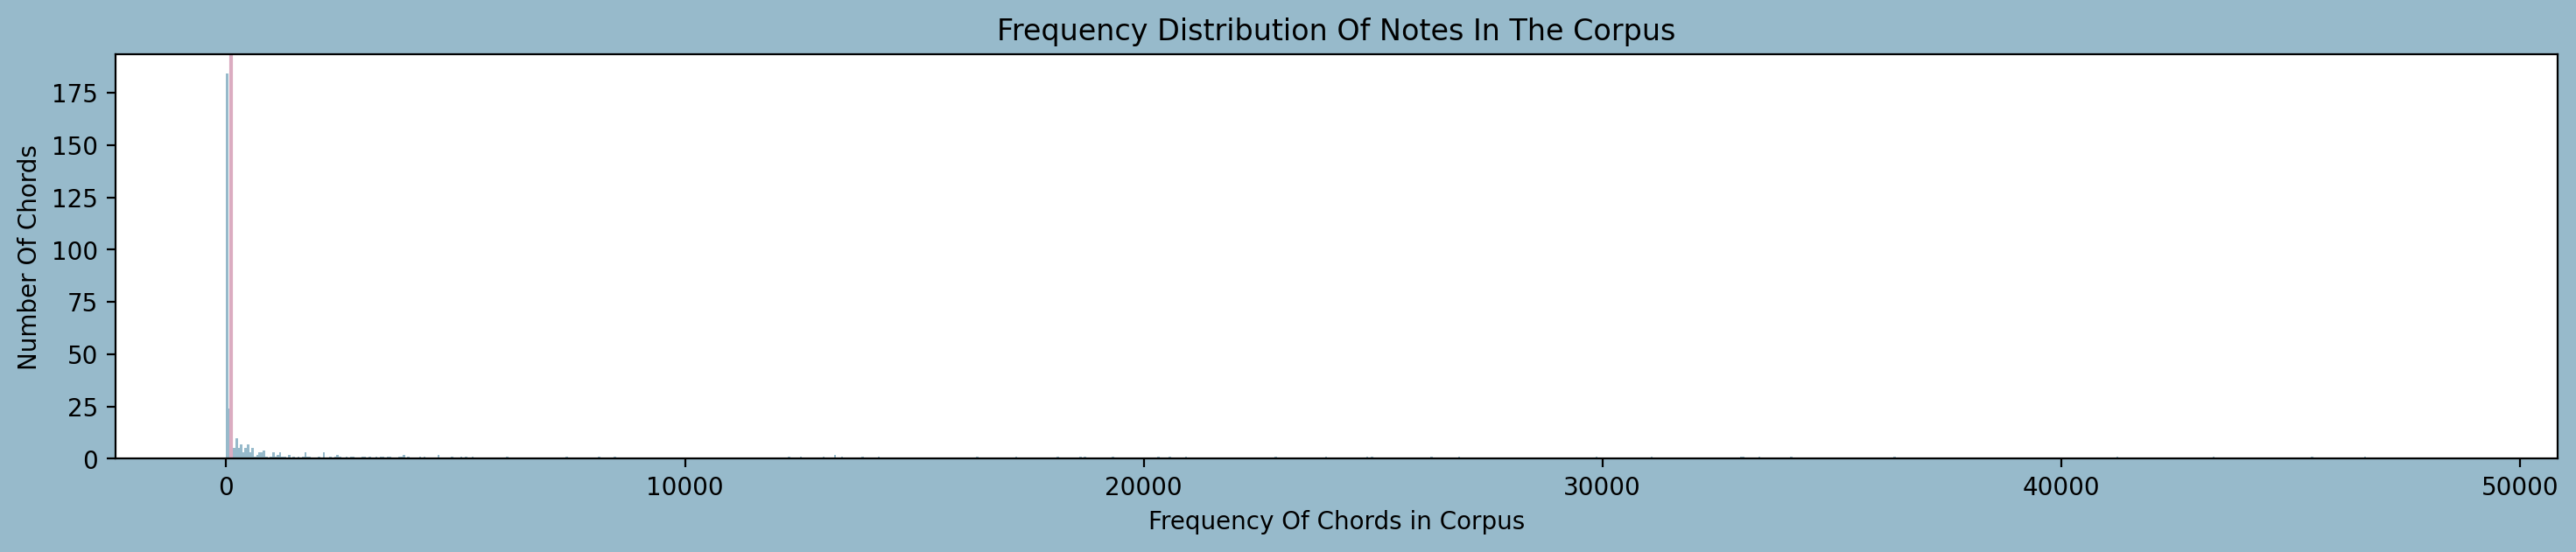

In [ ]:
# Plotting the distribution of Notes
plt.figure(figsize=(18,3),facecolor="#97BACB")
bins = np.arange(0,(max(Recurrence)), 50)
plt.hist(Recurrence, bins=bins, color="#97BACB")
plt.axvline(x= 100,color="#DBACC1")
plt.title("Frequency Distribution Of Notes In The Corpus")
plt.xlabel("Frequency Of Chords in Corpus")
plt.ylabel("Number Of Chords")
plt.show()

Taking out the notes that were played less than 100 times

In [ ]:
#Getting a list of rare chords
rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 100:
        m =  key
        rare_note.append(m)

print("Total number of notes that occur less than 100 times:", len(rare_note))

Total number of notes that occur less than 100 times: 208


In [ ]:
#Eleminating the rare notes
for element in Corpus:
    if element in rare_note:
        Corpus.remove(element)

print("Length of Corpus after elemination the rare notes:", len(Corpus))

Length of Corpus after elemination the rare notes: 1084826


This is the cleaned data Corpus that be used for the music generation. In the next section, we will preprocess teh Corpus for the training model.

**DATA PREPROCESSING**

Data preprocessing involves:

Loading Data ➡️ Preprocessing ➡️ Building Mapping Dictionary ➡️ Building Model ➡️ Generating Music


Musical notes are soundwaves. In music, we have certain specific combinations of Frequency and Wavelength standardized as notes. Our Corpus has the name of that note. As we parsed the data at the time of loading we took the help of the music21 library. The library fetches Frequency, Wavelength, duration etc for the given notes.

**Creating a list of sorted unique characters**

In [ ]:
# Storing all the unique characters present in my corpus to bult a mapping dic.
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 1084826
Number of unique characters: 268


**Encoding and Splitting the Corpus as Labels and Targets**

In [ ]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])


L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 1084786


In [ ]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)
# one hot encode the output variable
y = tensorflow.keras.utils.to_categorical(targets)

**Splitting Train and Seed datasets**

In [ ]:
#Taking out a subset of data to be used as seed
X_train, X_seed, y_train, y_seed = train_test_split(X, y, test_size=0.2, random_state=42)

**MODEL BUILDING**

**Building the Model**

In [ ]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adamax

# Assuming X is your input data, define it here with an appropriate value.
# For example, if it's a numpy array:
import numpy as np
X = np.random.rand(100, 10, 5)  # Replace with your actual data

# You need to define 'y', your target data, here.
# Make sure it has the correct shape to match your problem.
# For example, if you have 3 output classes:
y = np.random.randint(0, 3, size=(100, 3))  # Replace with your actual target data


#Initialising the Model
model = Sequential()

#Adding layers
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(256))
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))

#Compiling the model for training
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [ ]:
#Model's Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 512)           1060864   
                                                                 
 dropout_2 (Dropout)         (None, 10, 512)           0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               787456    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1914883 (7.30 MB)
Trainable params: 1914

In [ ]:
#Training the Model
# Assuming X and y are your complete dataset, split them into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, batch_size=256, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 3.5541 - val_loss: 5.2238
Epoch 2/200
1/1 [==============================] - 0s 361ms/step - loss: 6.0881 - val_loss: 4.5509
Epoch 3/200
1/1 [==============================] - 0s 424ms/step - loss: 5.6921 - val_loss: 5.8551
Epoch 4/200
1/1 [==============================] - 0s 362ms/step - loss: 7.1618 - val_loss: 7.3937
Epoch 5/200
1/1 [==============================] - 0s 401ms/step - loss: 7.9696 - val_loss: 8.3858
Epoch 6/200
1/1 [==============================] - 0s 364ms/step - loss: 9.4443 - val_loss: 10.7314
Epoch 7/200
1/1 [==============================] - 0s 366ms/step - loss: 12.1527 - val_loss: 18.5464
Epoch 8/200
1/1 [==============================] - 0s 390ms/step - loss: 17.1519 - val_loss: 25.4498
Epoch 9/200
1/1 [==============================] - 0s 367ms/step - loss: 25.7292 - val_loss: 27.5194
Epoch 10/200
1/1 [==============================] - 0s 390ms/step - loss: 29.1898 - val_loss: 24.8666
Epo

**EVALUATING THE MODEL**

**Plotting the learning curve for the loss function**

[Text(0.5, 0, 'Epochs')]

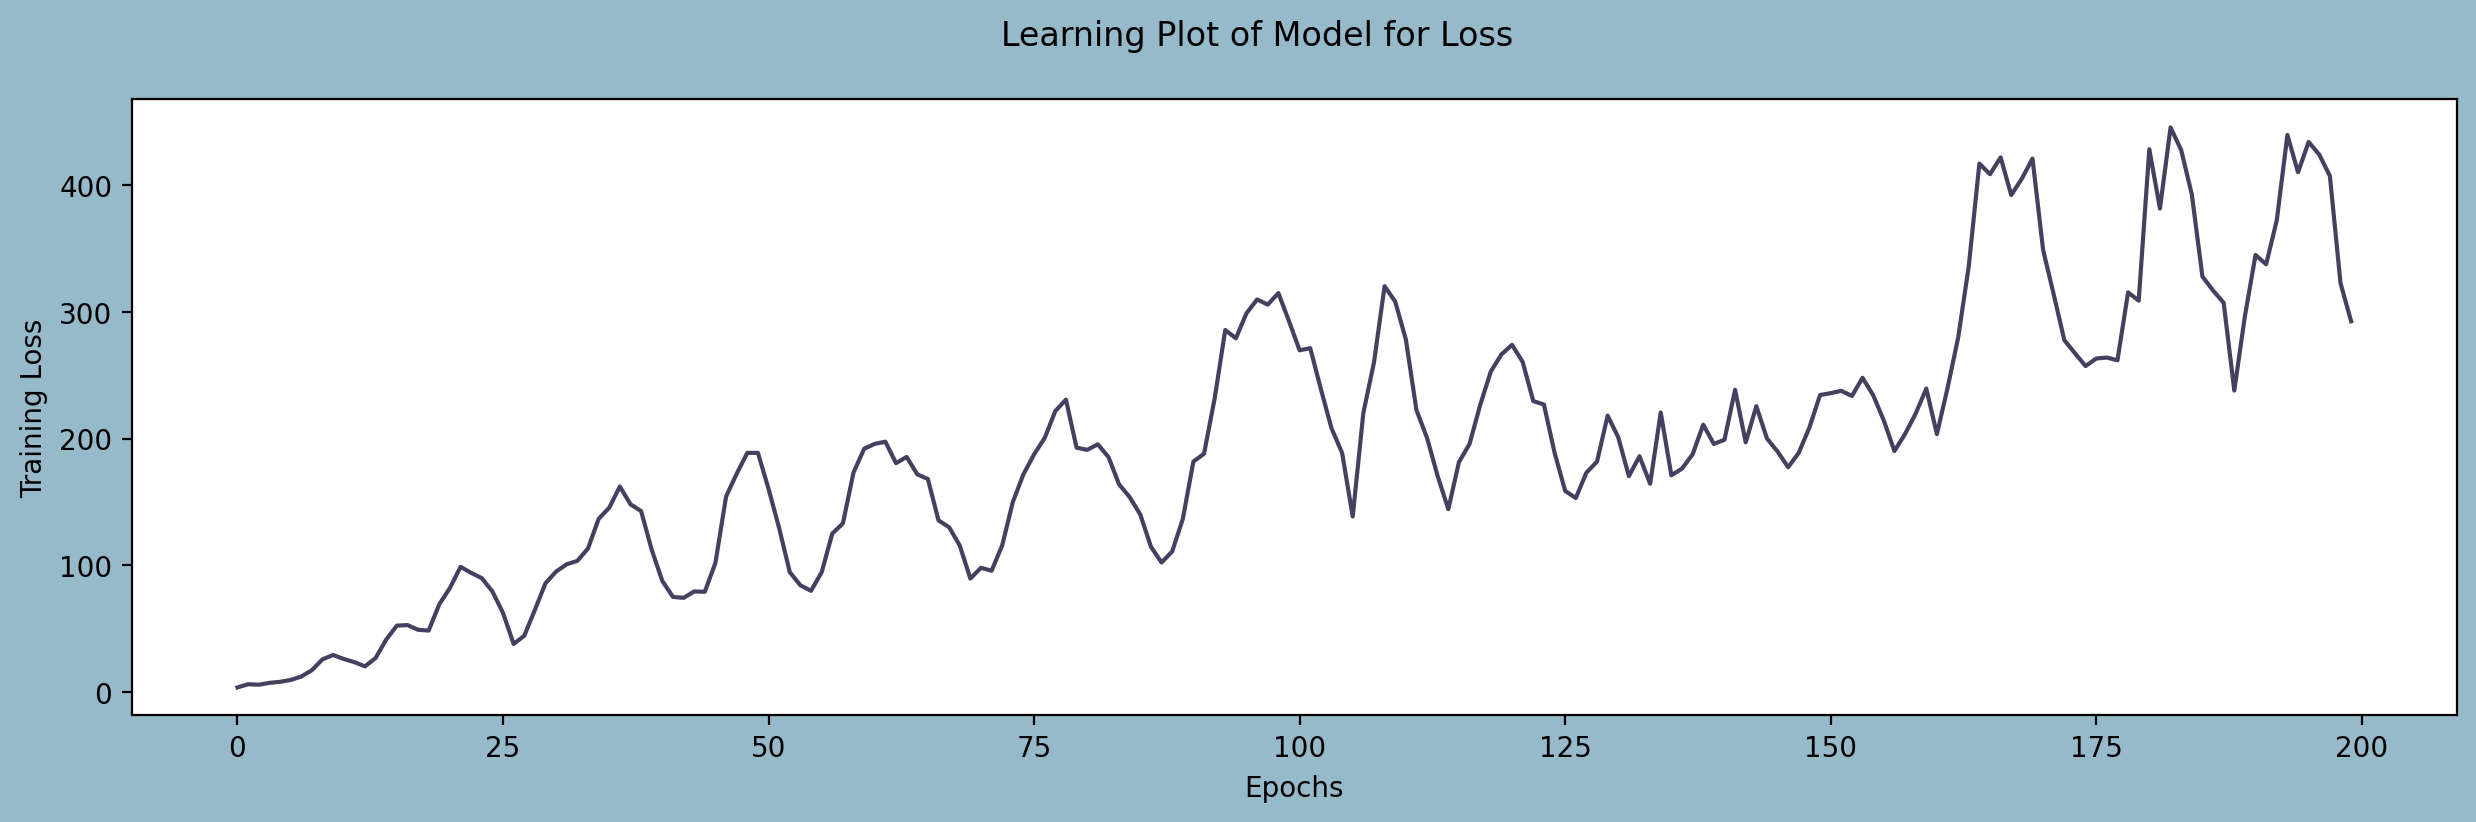

In [ ]:
#Plotting the learnings
history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4), facecolor="#97BACB")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")